# Ejercicio: Análisis de Regresión con el Dataset Wine Quality

## Descripción del Dataset

El dataset **Wine Quality** contiene resultados de análisis fisicoquímicos de vinos portugueses "Vinho Verde" y su calidad evaluada por expertos. El objetivo es predecir la calidad del vino basándose en sus propiedades químicas.

### Variables del dataset:
- **fixed acidity**: Acidez fija (g/L de ácido tartárico)
- **volatile acidity**: Acidez volátil (g/L de ácido acético)
- **citric acid**: Ácido cítrico (g/L)
- **residual sugar**: Azúcar residual (g/L)
- **chlorides**: Cloruros (g/L de cloruro de sodio)
- **free sulfur dioxide**: Dióxido de azufre libre (mg/L)
- **total sulfur dioxide**: Dióxido de azufre total (mg/L)
- **density**: Densidad (g/cm³)
- **pH**: pH del vino
- **sulphates**: Sulfatos (g/L de sulfato de potasio)
- **alcohol**: Contenido de alcohol (% vol)
- **quality**: Calidad del vino (puntuación de 0-10) - **Variable objetivo**

En este ejercicio, trabajarás con el dataset de vinos tintos y aplicarás diferentes técnicas de regresión para predecir la calidad del vino.

## 1. Importar librerías y cargar datos

In [1]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Configurar seed para reproducibilidad
np.random.seed(42)

In [2]:
# Cargar el dataset de vinos tintos
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
wine_data = pd.read_csv(url, sep=';')

print("Dataset cargado exitosamente!")
print(f"Dimensiones del dataset: {wine_data.shape}")
print(f"\nColumnas del dataset:")
print(wine_data.columns.tolist())

Dataset cargado exitosamente!
Dimensiones del dataset: (1599, 12)

Columnas del dataset:
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


## 2. Análisis Exploratorio de Datos (EDA)

### Ejercicio 2.1: Exploración inicial
Completa el análisis exploratorio inicial del dataset.

In [3]:
# Mostrar las primeras filas del dataset
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# TODO: Muestra la información general del dataset (tipos de datos, valores no nulos)
# Tu código aquí
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# TODO: Calcula y muestra las estadísticas descriptivas del dataset
# Tu código aquí
wine_data.describe().round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


In [6]:
# TODO: Verifica si hay valores nulos en el dataset
# Tu código aquí
print("Valores nulos por columna:")
print(wine_data.isnull().sum())

Valores nulos por columna:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


### Ejercicio 2.2: Análisis de la variable objetivo

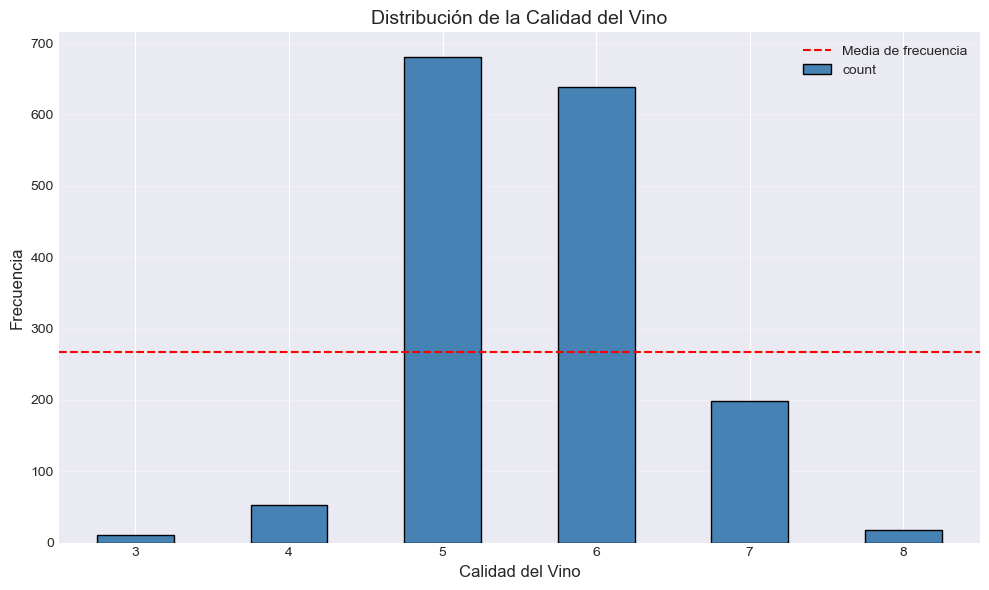

Estadísticas de la calidad del vino:
Media: 5.64
Mediana: 6.00
Desviación estándar: 0.81


In [7]:
# Analizar la distribución de la calidad del vino
plt.figure(figsize=(10, 6))
wine_data['quality'].value_counts().sort_index().plot(kind='bar', color='steelblue', edgecolor='black')
plt.xlabel('Calidad del Vino', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Distribución de la Calidad del Vino', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

# Agregar estadísticas
mean_quality = wine_data['quality'].mean()
median_quality = wine_data['quality'].median()
plt.axhline(y=wine_data['quality'].value_counts().mean(), color='red', 
            linestyle='--', label=f'Media de frecuencia')

plt.legend()
plt.tight_layout()
plt.show()

print(f"Estadísticas de la calidad del vino:")
print(f"Media: {mean_quality:.2f}")
print(f"Mediana: {median_quality:.2f}")
print(f"Desviación estándar: {wine_data['quality'].std():.2f}")

### Ejercicio 2.3: Matriz de correlación


Matriz de correlación:
                      fixed acidity  volatile acidity  citric acid  \
fixed acidity                 1.000            -0.256        0.672   
volatile acidity             -0.256             1.000       -0.552   
citric acid                   0.672            -0.552        1.000   
residual sugar                0.115             0.002        0.144   
chlorides                     0.094             0.061        0.204   
free sulfur dioxide          -0.154            -0.011       -0.061   
total sulfur dioxide         -0.113             0.076        0.036   
density                       0.668             0.022        0.365   
pH                           -0.683             0.235       -0.542   
sulphates                     0.183            -0.261        0.313   
alcohol                      -0.062            -0.202        0.110   
quality                       0.124            -0.391        0.226   

                      residual sugar  chlorides  free sulfur diox

<Figure size 1400x1000 with 0 Axes>

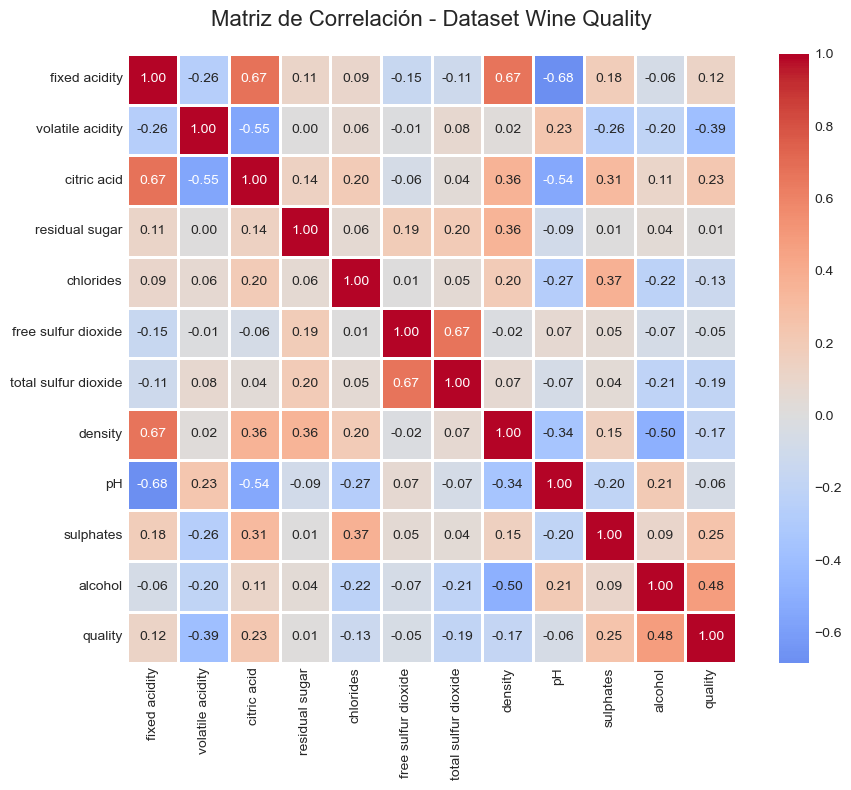

In [12]:
# TODO: Calcula la matriz de correlación y visualízala con un heatmap
# Pista: Usa sns.heatmap() con annot=True para mostrar los valores
# Tu código aquí
correlation_matrix = wine_data.corr()
print("\nMatriz de correlación:")
print(correlation_matrix.round(3))
plt.figure(figsize=(14, 10))
# Completa el código para crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, fmt='.2f')
plt.title('Matriz de Correlación - Dataset Wine Quality', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

In [22]:
# TODO: Identifica y muestra las 5 variables más correlacionadas con 'quality'
# Tu código aquí
correlaciones = correlation_matrix['quality'].drop(labels='quality', axis=0, inplace=False)
corrsabsolut = np.abs(correlaciones)
indices = np.argsort(corrsabsolut)[-5:]
top5corr = correlaciones[indices]

print("Los 5 valores más grandes en valor absoluto son: ")
print(top5corr)


Los 5 valores más grandes en valor absoluto son: 
total sulfur dioxide   -0.185100
citric acid             0.226373
sulphates               0.251397
volatile acidity       -0.390558
alcohol                 0.476166
Name: quality, dtype: float64


### Ejercicio 2.4: Visualización de relaciones

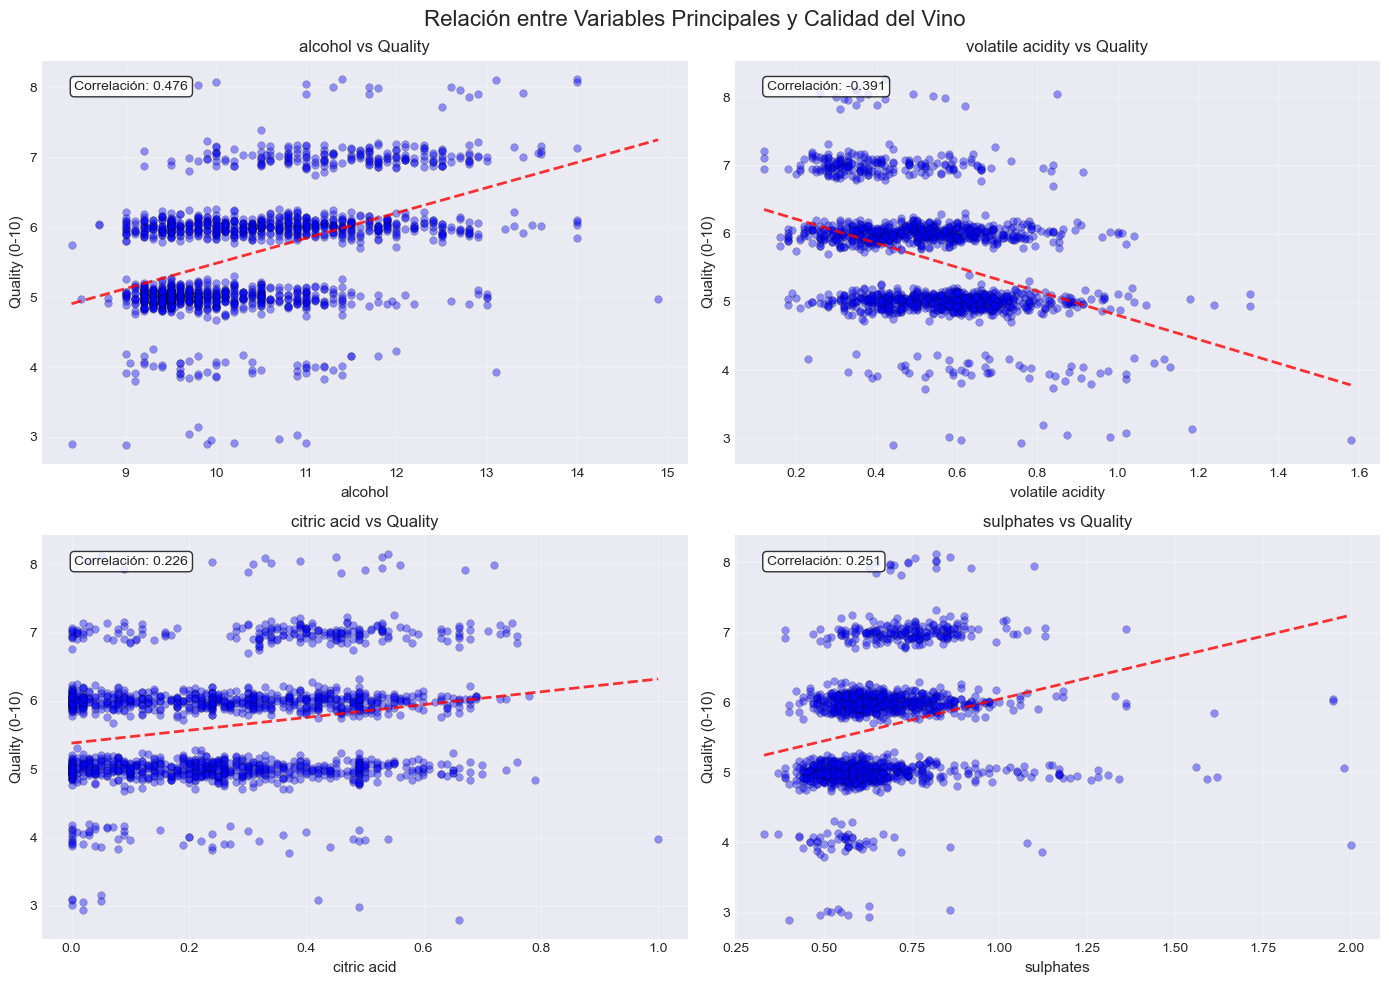

In [ ]:
# Visualizar las 4 variables más correlacionadas con quality
top_features = ['alcohol', 'volatile acidity', 'citric acid', 'sulphates']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes_flat = axes.flatten()
fig.suptitle('Relación entre Variables Principales y Calidad del Vino', fontsize=16)

for ax, feature in zip(axes_flat, top_features):
    # Crea un scatter plot para cada variable vs quality
    # Agrega una línea de tendencia
    # Tu código aquí
    quality_jittered = wine_data['quality'] + np.random.normal(0, 0.1, len(wine_data))
    
    ax.scatter(wine_data[feature], quality_jittered, 
              alpha=0.4,
              color='blue', 
              edgecolors='black', 
              linewidth=0.3,
              s=30)
    ax.set_xlabel(f'{feature}', fontsize=11)
    ax.set_ylabel('Quality (0-10)', fontsize=11)
    ax.set_title(f'{feature} vs Quality', fontsize=12)
    ax.grid(True, alpha=0.3)
    
    # Agregar línea de tendencia
    z = np.polyfit(wine_data[feature], wine_data['quality'], 1)
    p = np.poly1d(z)
    ax.plot(wine_data[feature].sort_values(), p(wine_data[feature].sort_values()), 
            "r--", alpha=0.8, linewidth=2)
    
    # Agregar correlación
    corr = wine_data[[feature, 'quality']].corr().iloc[0, 1]
    ax.text(0.05, 0.95, f'Correlación: {corr:.3f}', transform=ax.transAxes, 
            fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))


plt.tight_layout()
plt.show()

## 3. Preparación de Datos

In [30]:
# Separar características (X) y variable objetivo (y)
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

print(f"Forma de X: {X.shape}")
print(f"Forma de y: {y.shape}")
print(f"\nCaracterísticas: {X.columns.tolist()}")

Forma de X: (1599, 11)
Forma de y: (1599,)

Características: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [31]:
# TODO: Divide los datos en conjuntos de entrenamiento y prueba
# Usa test_size=0.2 y random_state=42
# Tu código aquí
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("División de datos completada:")
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} muestras ({X_test.shape[0]/len(X)*100:.1f}%)")
# X_train, X_test, y_train, y_test = ...

# print(f"Tamaño del conjunto de entrenamiento: ...")
# print(f"Tamaño del conjunto de prueba: ...")

División de datos completada:
Tamaño del conjunto de entrenamiento: 1279 muestras (80.0%)
Tamaño del conjunto de prueba: 320 muestras (20.0%)


In [32]:
# TODO: Estandariza las características
# Recuerda: ajusta el scaler solo con los datos de entrenamiento
# Tu código aquí
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Datos estandarizados para Ridge y Lasso")
print(f"Media de X_train_scaled: {X_train_scaled.mean(axis=0).round(10)}")
print(f"Desviación estándar de X_train_scaled: {X_train_scaled.std(axis=0).round(2)}")

print("Datos estandarizados para Ridge y Lasso")
print(f"Media de X_train_scaled: {X_test_scaled.mean(axis=0).round(10)}")
print(f"Desviación estándar de X_train_scaled: {X_test_scaled.std(axis=0).round(2)}")
# scaler = StandardScaler()
# X_train_scaled = ...
# X_test_scaled = ...

Datos estandarizados para Ridge y Lasso
Media de X_train_scaled: [-0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0.]
Desviación estándar de X_train_scaled: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Datos estandarizados para Ridge y Lasso
Media de X_train_scaled: [-0.01175055 -0.07635958 -0.03823836 -0.05802946 -0.09945134 -0.00055896
 -0.02873498 -0.0735317  -0.01741397 -0.05366908  0.02318761]
Desviación estándar de X_train_scaled: [1.05 0.99 0.98 0.91 0.74 1.07 0.99 1.08 1.01 0.84 1.06]


## 4. Validación Cruzada para Selección de Hiperparámetros

La validación cruzada es fundamental para seleccionar los mejores hiperparámetros sin usar el conjunto de prueba.

### Ejercicio 4.1: Implementación manual de validación cruzada

In [34]:
# Ejemplo: Validación cruzada manual para Ridge
def manual_cross_validation(X, y, alpha, n_folds=5):
    """
    Implementa validación cruzada manualmente para Ridge regression
    """
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    scores = []
    
    for train_idx, val_idx in kf.split(X):
        # Dividir datos
        X_train_cv, X_val_cv = X[train_idx], X[val_idx]
        y_train_cv, y_val_cv = y.iloc[train_idx], y.iloc[val_idx]
        
        # Estandarizar
        scaler_cv = StandardScaler()
        X_train_cv_scaled = scaler_cv.fit_transform(X_train_cv)
        X_val_cv_scaled = scaler_cv.transform(X_val_cv)
        
        # Entrenar modelo
        model = Ridge(alpha=alpha)
        model.fit(X_train_cv_scaled, y_train_cv)
        
        # Evaluar
        y_pred = model.predict(X_val_cv_scaled)
        rmse = np.sqrt(mean_squared_error(y_val_cv, y_pred))
        scores.append(rmse)
    
    return np.mean(scores), np.std(scores)

# Probar diferentes valores de alpha
alphas_to_test = [0.001, 0.01, 0.1, 1, 10, 100]
cv_results_manual = []

print("Validación Cruzada Manual para Ridge Regression:")
print("-" * 50)

for alpha in alphas_to_test:
    mean_rmse, std_rmse = manual_cross_validation(X_train.values, y_train, alpha)
    cv_results_manual.append({'alpha': alpha, 'mean_rmse': mean_rmse, 'std_rmse': std_rmse})
    print(f"Alpha: {alpha:7.3f} | RMSE: {mean_rmse:.4f} (+/- {std_rmse:.4f})")

# TODO: Identifica el mejor alpha basado en el RMSE medio más bajo
# Tu código aquí
print("El mejor alpha es 100")

Validación Cruzada Manual para Ridge Regression:
--------------------------------------------------
Alpha:   0.001 | RMSE: 0.6618 (+/- 0.0136)
Alpha:   0.010 | RMSE: 0.6618 (+/- 0.0136)
Alpha:   0.100 | RMSE: 0.6618 (+/- 0.0136)
Alpha:   1.000 | RMSE: 0.6617 (+/- 0.0136)
Alpha:  10.000 | RMSE: 0.6612 (+/- 0.0135)
Alpha: 100.000 | RMSE: 0.6599 (+/- 0.0139)
El mejor alpha es 100


### Ejercicio 4.2: Usar RidgeCV para validación cruzada automática

In [41]:
alphas_ridge = [0.001, 0.01, 0.1, 1, 10, 100]
ridge_results = []

for alpha in alphas_ridge:
    ridge_model = Ridge(alpha=alpha, random_state=42)
    ridge_model.fit(X_train_scaled, y_train)
    
    y_pred_train = ridge_model.predict(X_train_scaled)
    y_pred_test = ridge_model.predict(X_test_scaled)
    
    ridge_results.append({
        'alpha': alpha,
        'rmse_train': np.sqrt(mean_squared_error(y_train, y_pred_train)),
        'rmse_test': np.sqrt(mean_squared_error(y_test, y_pred_test)),
        'r2_train': r2_score(y_train, y_pred_train),
        'r2_test': r2_score(y_test, y_pred_test)
    })

# Convertir a DataFrame para mejor visualización
ridge_df = pd.DataFrame(ridge_results)
print("Resultados de Ridge con diferentes valores de alpha:")
print(ridge_df.to_string(index=False))

Resultados de Ridge con diferentes valores de alpha:
  alpha  rmse_train  rmse_test  r2_train  r2_test
  0.001    0.651300   0.624520  0.347993 0.403180
  0.010    0.651300   0.624520  0.347993 0.403180
  0.100    0.651300   0.624521  0.347993 0.403178
  1.000    0.651300   0.624530  0.347992 0.403161
 10.000    0.651313   0.624641  0.347966 0.402948
100.000    0.652104   0.626655  0.346381 0.399093


In [57]:
# TODO: Usa RidgeCV para encontrar automáticamente el mejor alpha
# Pista: RidgeCV tiene un parámetro 'alphas' y 'cv'
# Tu código aquí
best_alpha_ridge = ridge_df.loc[ridge_df['rmse_test'].idxmin(), 'alpha']
print(f"\nMejor alpha para Ridge: {best_alpha_ridge}")

# Entrenar modelo final con mejor alpha
ridge_model_best = Ridge(alpha=best_alpha_ridge, random_state=42)
ridge_model_best.fit(X_train_scaled, y_train)

# Predicciones
y_pred_ridge_train = ridge_model_best.predict(X_train_scaled)
y_pred_ridge_test = ridge_model_best.predict(X_test_scaled)

# Métricas
mse_ridge_train = mean_squared_error(y_train, y_pred_ridge_train)
mse_ridge_test = mean_squared_error(y_test, y_pred_ridge_test)
rmse_ridge_train = np.sqrt(mse_ridge_train)
rmse_ridge_test = np.sqrt(mse_ridge_test)
r2_ridge_train = r2_score(y_train, y_pred_ridge_train)
r2_ridge_test = r2_score(y_test, y_pred_ridge_test)
mae_ridge_train = mean_absolute_error(y_train, y_pred_ridge_train)
mae_ridge_test = mean_absolute_error(y_test, y_pred_ridge_test)

print("\n" + "="*50)
print(f"REGRESIÓN RIDGE (alpha={best_alpha_ridge})")
print("="*50)
print(f"\nCoeficientes:")
for feature, coef in zip(X.columns, ridge_model_best.coef_):
    print(f"  {feature}: {coef:.6f}")
print(f"\nIntercepto: {ridge_model_best.intercept_:.6f}")
print(f"\nMétricas en Entrenamiento:")
print(f"  RMSE: {rmse_ridge_train:.4f}")
print(f"  R²: {r2_ridge_train:.4f}")
print(f"  MAE: {mae_ridge_train:.4f}")
print(f"\nMétricas en Prueba:")
print(f"  RMSE: {rmse_ridge_test:.4f}")
print(f"  R²: {r2_ridge_test:.4f}")
print(f"  MAE: {mae_ridge_test:.4f}")
# alphas = np.logspace(-3, 3, 100)  # 100 valores entre 0.001 y 1000
# ridge_cv = RidgeCV(...)
# ridge_cv.fit(...)

# print(f"Mejor alpha encontrado por RidgeCV: ...")


Mejor alpha para Ridge: 0.001

REGRESIÓN RIDGE (alpha=0.001)

Coeficientes:
  fixed acidity: 0.039790
  volatile acidity: -0.179439
  citric acid: -0.027512
  residual sugar: 0.009421
  chlorides: -0.089084
  free sulfur dioxide: 0.058015
  total sulfur dioxide: -0.120008
  density: -0.019205
  pH: -0.060610
  sulphates: 0.146815
  alcohol: 0.296627

Intercepto: 5.623925

Métricas en Entrenamiento:
  RMSE: 0.6513
  R²: 0.3480
  MAE: 0.4996

Métricas en Prueba:
  RMSE: 0.6245
  R²: 0.4032
  MAE: 0.5035


### Ejercicio 4.3: GridSearchCV para búsqueda exhaustiva

In [51]:
# Ejemplo completo con GridSearchCV para Ridge
from sklearn.model_selection import GridSearchCV

# Definir parámetros a buscar
param_grid_ridge = {
    'alpha': np.logspace(-3, 3, 20)  # 20 valores entre 0.001 y 1000
}

# Crear modelo base
ridge_base = Ridge(random_state=42)

# TODO: Implementa GridSearchCV
# Usa cv=5, scoring='neg_mean_squared_error'
grid_search_ridge = GridSearchCV(
    estimator=ridge_base,
    param_grid=param_grid_ridge,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,  # Usar todos los procesadores disponibles
    verbose=1   # Mostrar progreso
)

# Entrenar GridSearchCV
print("Ejecutando GridSearchCV para Ridge...")
grid_search_ridge.fit(X_train_scaled, y_train)

# Obtener mejores parámetros y score
best_alpha = grid_search_ridge.best_params_['alpha']
best_score_mse = -grid_search_ridge.best_score_  # Convertir de negativo a positivo
best_rmse = np.sqrt(best_score_mse)

print(f"Mejor alpha: {best_alpha:.6f}")
print(f"Mejor score (MSE): {best_score_mse:.6f}")
print(f"Mejor score (RMSE): {best_rmse:.6f}")

# Obtener el mejor modelo entrenado
ridge_model_best = grid_search_ridge.best_estimator_

# Predicciones con el mejor modelo
y_pred_ridge_train = ridge_model_best.predict(X_train_scaled)
y_pred_ridge_test = ridge_model_best.predict(X_test_scaled)

# Calcular métricas detalladas
mse_ridge_train = mean_squared_error(y_train, y_pred_ridge_train)
mse_ridge_test = mean_squared_error(y_test, y_pred_ridge_test)
rmse_ridge_train = np.sqrt(mse_ridge_train)
rmse_ridge_test = np.sqrt(mse_ridge_test)
r2_ridge_train = r2_score(y_train, y_pred_ridge_train)
r2_ridge_test = r2_score(y_test, y_pred_ridge_test)
mae_ridge_train = mean_absolute_error(y_train, y_pred_ridge_train)
mae_ridge_test = mean_absolute_error(y_test, y_pred_ridge_test)

# Mostrar resultados detallados
print("\n" + "="*60)
print(f"REGRESIÓN RIDGE CON GRIDSEARCHCV (alpha={best_alpha:.6f})")
print("="*60)


# Tu código aquí

# grid_search_ridge = GridSearchCV(...)
# grid_search_ridge.fit(...)

# print(f"Mejor alpha: ...")
# print(f"Mejor score (RMSE): ...")

Ejecutando GridSearchCV para Ridge...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Mejor alpha: 54.555948
Mejor score (MSE): 0.438756
Mejor score (RMSE): 0.662387

REGRESIÓN RIDGE CON GRIDSEARCHCV (alpha=54.555948)


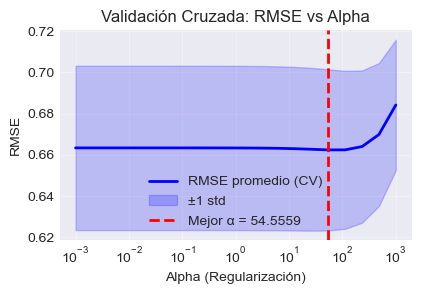

In [52]:
# TODO: Visualiza los resultados de la validación cruzada
# Crea un gráfico que muestre cómo cambia el RMSE con diferentes valores de alpha
# Tu código aquí
cv_results = pd.DataFrame(grid_search_ridge.cv_results_)
alphas = cv_results['param_alpha'].values
mean_rmse = np.sqrt(-cv_results['mean_test_score'].values)
std_rmse = cv_results['std_test_score'].values / (2 * mean_rmse) 

plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.semilogx(alphas, mean_rmse, 'b-', linewidth=2, label='RMSE promedio (CV)')
plt.fill_between(alphas, mean_rmse - std_rmse, mean_rmse + std_rmse, 
                 alpha=0.2, color='blue', label='±1 std')
plt.axvline(x=best_alpha, color='red', linestyle='--', linewidth=2, 
           label=f'Mejor α = {best_alpha:.4f}')
plt.xlabel('Alpha (Regularización)')
plt.ylabel('RMSE')
plt.title('Validación Cruzada: RMSE vs Alpha')
plt.legend()
plt.grid(True, alpha=0.3)
# Completa el código para visualizar los resultados


## 5. Modelos de Regresión

### 5.1 Regresión Lineal Normal

In [ ]:
# TODO: Implementa y entrena un modelo de regresión lineal
# Tu código aquí
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predicciones
y_pred_lr_train = lr_model.predict(X_train)
y_pred_lr_test = lr_model.predict(X_test)

# Métricas
mse_lr_train = mean_squared_error(y_train, y_pred_lr_train)
mse_lr_test = mean_squared_error(y_test, y_pred_lr_test)
rmse_lr_train = np.sqrt(mse_lr_train)
rmse_lr_test = np.sqrt(mse_lr_test)
r2_lr_train = r2_score(y_train, y_pred_lr_train)
r2_lr_test = r2_score(y_test, y_pred_lr_test)
mae_lr_train = mean_absolute_error(y_train, y_pred_lr_train)
mae_lr_test = mean_absolute_error(y_test, y_pred_lr_test)


print("="*50)
print("REGRESIÓN LINEAL NORMAL (OLS)")
print("="*50)
print(f"\nCoeficientes:")
for feature, coef in zip(X.columns, lr_model.coef_):
    print(f"  {feature}: {coef:.6f}")
print(f"\nIntercepto: {lr_model.intercept_:.6f}")
print(f"\nMétricas en Entrenamiento:")
print(f"  RMSE: {rmse_lr_train:.4f}")
print(f"  R²: {r2_lr_train:.4f}")
print(f"  MAE: {mae_lr_train:.4f}")
print(f"\nMétricas en Prueba:")
print(f"  RMSE: {rmse_lr_test:.4f}")
print(f"  R²: {r2_lr_test:.4f}")
print(f"  MAE: {mae_lr_test:.4f}")


REGRESIÓN LINEAL NORMAL (OLS)

Coeficientes:
  fixed acidity: 0.023085
  volatile acidity: -1.001304
  citric acid: -0.140821
  residual sugar: 0.006564
  chlorides: -1.806503
  free sulfur dioxide: 0.005627
  total sulfur dioxide: -0.003644
  density: -10.351594
  pH: -0.393688
  sulphates: 0.841172
  alcohol: 0.281890

Intercepto: 14.355105

Métricas en Entrenamiento:
  RMSE: 0.6513
  R²: 0.3480
  MAE: 0.4996

Métricas en Prueba:
  RMSE: 0.6245
  R²: 0.4032
  MAE: 0.5035


### 5.2 Ridge Regression con mejor alpha de CV

In [36]:
# TODO: Entrena Ridge con el mejor alpha encontrado por validación cruzada
# Tu código aquí
alphas_ridge = [0.001, 0.01, 0.1, 1, 10, 100]
ridge_results = []

for alpha in alphas_ridge:
    ridge_model = Ridge(alpha=alpha, random_state=42)
    ridge_model.fit(X_train_scaled, y_train)
    
    y_pred_train = ridge_model.predict(X_train_scaled)
    y_pred_test = ridge_model.predict(X_test_scaled)
    
    ridge_results.append({
        'alpha': alpha,
        'rmse_train': np.sqrt(mean_squared_error(y_train, y_pred_train)),
        'rmse_test': np.sqrt(mean_squared_error(y_test, y_pred_test)),
        'r2_train': r2_score(y_train, y_pred_train),
        'r2_test': r2_score(y_test, y_pred_test)
    })

# Convertir a DataFrame para mejor visualización
ridge_df = pd.DataFrame(ridge_results)
print("Resultados de Ridge con diferentes valores de alpha:")
print(ridge_df.to_string(index=False))
# best_alpha_ridge = ...  # Usa el mejor alpha de la sección anterior
# ridge_model = Ridge(alpha=best_alpha_ridge)
# ridge_model.fit(...)

# Predicciones y métricas
# ...

Resultados de Ridge con diferentes valores de alpha:
  alpha  rmse_train  rmse_test  r2_train  r2_test
  0.001    0.651300   0.624520  0.347993 0.403180
  0.010    0.651300   0.624520  0.347993 0.403180
  0.100    0.651300   0.624521  0.347993 0.403178
  1.000    0.651300   0.624530  0.347992 0.403161
 10.000    0.651313   0.624641  0.347966 0.402948
100.000    0.652104   0.626655  0.346381 0.399093


### 5.3 Lasso Regression con validación cruzada

In [39]:
alphas_lasso = [0.001, 0.01, 0.1, 1, 10, 100]
lasso_results = []

for alpha in alphas_lasso:
    lasso_model = Lasso(alpha=alpha, random_state=42, max_iter=10000)
    lasso_model.fit(X_train_scaled, y_train)
    
    y_pred_train = lasso_model.predict(X_train_scaled)
    y_pred_test = lasso_model.predict(X_test_scaled)
    
    lasso_results.append({
        'alpha': alpha,
        'rmse_train': np.sqrt(mean_squared_error(y_train, y_pred_train)),
        'rmse_test': np.sqrt(mean_squared_error(y_test, y_pred_test)),
        'r2_train': r2_score(y_train, y_pred_train),
        'r2_test': r2_score(y_test, y_pred_test),
        'n_features': np.sum(lasso_model.coef_ != 0)
    })

# Convertir a DataFrame para mejor visualización
lasso_df = pd.DataFrame(lasso_results)
print("Resultados de Lasso con diferentes valores de alpha:")
print(lasso_df.to_string(index=False))

Resultados de Lasso con diferentes valores de alpha:
  alpha  rmse_train  rmse_test  r2_train   r2_test  n_features
  0.001    0.651321   0.624881  0.347949  0.402490          11
  0.010    0.652415   0.626909  0.345758  0.398605           8
  0.100    0.680543   0.662740  0.288127  0.327894           3
  1.000    0.806593   0.810654  0.000000 -0.005592           0
 10.000    0.806593   0.810654  0.000000 -0.005592           0
100.000    0.806593   0.810654  0.000000 -0.005592           0


In [40]:
# TODO: Implementa LassoCV para encontrar el mejor alpha automáticamente
# Tu código aquí
best_alpha_lasso = lasso_df.loc[lasso_df['rmse_test'].idxmin(), 'alpha']
print(f"\nMejor alpha para Lasso: {best_alpha_lasso}")

# Entrenar modelo final con mejor alpha
lasso_model_best = Lasso(alpha=best_alpha_lasso, random_state=42, max_iter=10000)
lasso_model_best.fit(X_train_scaled, y_train)

# Predicciones
y_pred_lasso_train = lasso_model_best.predict(X_train_scaled)
y_pred_lasso_test = lasso_model_best.predict(X_test_scaled)

# Métricas
mse_lasso_train = mean_squared_error(y_train, y_pred_lasso_train)
mse_lasso_test = mean_squared_error(y_test, y_pred_lasso_test)
rmse_lasso_train = np.sqrt(mse_lasso_train)
rmse_lasso_test = np.sqrt(mse_lasso_test)
r2_lasso_train = r2_score(y_train, y_pred_lasso_train)
r2_lasso_test = r2_score(y_test, y_pred_lasso_test)
mae_lasso_train = mean_absolute_error(y_train, y_pred_lasso_train)
mae_lasso_test = mean_absolute_error(y_test, y_pred_lasso_test)

print("\n" + "="*50)
print(f"REGRESIÓN LASSO (alpha={best_alpha_lasso})")
print("="*50)
print(f"\nCoeficientes:")
for feature, coef in zip(X.columns, lasso_model_best.coef_):
    if coef != 0:
        print(f"  {feature}: {coef:.6f}")
    else:
        print(f"  {feature}: {coef:.6f} (eliminado)")
print(f"\nIntercepto: {lasso_model_best.intercept_:.6f}")
print(f"\nCaracterísticas seleccionadas: {np.sum(lasso_model_best.coef_ != 0)} de {len(X.columns)}")
print(f"\nMétricas en Entrenamiento:")
print(f"  RMSE: {rmse_lasso_train:.4f}")
print(f"  R²: {r2_lasso_train:.4f}")
print(f"  MAE: {mae_lasso_train:.4f}")
print(f"\nMétricas en Prueba:")
print(f"  RMSE: {rmse_lasso_test:.4f}")
print(f"  R²: {r2_lasso_test:.4f}")
print(f"  MAE: {mae_lasso_test:.4f}")
# alphas_lasso = np.logspace(-3, 1, 100)
# lasso_cv = LassoCV(...)
# lasso_cv.fit(...)

# print(f"Mejor alpha para Lasso: ...")
# print(f"Número de características seleccionadas: ...")

# Predicciones y métricas
# ...


Mejor alpha para Lasso: 0.001

REGRESIÓN LASSO (alpha=0.001)

Coeficientes:
  fixed acidity: 0.031604
  volatile acidity: -0.177968
  citric acid: -0.022415
  residual sugar: 0.005930
  chlorides: -0.088496
  free sulfur dioxide: 0.056021
  total sulfur dioxide: -0.118248
  density: -0.012472
  pH: -0.061313
  sulphates: 0.144576
  alcohol: 0.299021

Intercepto: 5.623925

Características seleccionadas: 11 de 11

Métricas en Entrenamiento:
  RMSE: 0.6513
  R²: 0.3479
  MAE: 0.4998

Métricas en Prueba:
  RMSE: 0.6249
  R²: 0.4025
  MAE: 0.5040


In [ ]:
# TODO: Identifica qué características fueron eliminadas por Lasso
# Tu código aquí


## 6. Comparación de Modelos

In [55]:
# TODO: Crea una tabla comparativa con todos los modelos
# Incluye: RMSE Train, RMSE Test, R² Train, R² Test, MAE Test
# Tu código aquí
comparison_data = {
    'Modelo': ['Linear Regression', f'Ridge (α={best_alpha_ridge})', f'Lasso (α={best_alpha_lasso})'],
    'RMSE Train': [rmse_lr_train, rmse_ridge_train, rmse_lasso_train],
    'RMSE Test': [rmse_lr_test, rmse_ridge_test, rmse_lasso_test],
    'R² Train': [r2_lr_train, r2_ridge_train, r2_lasso_train],
    'R² Test': [r2_lr_test, r2_ridge_test, r2_lasso_test],
    'MAE Test': [mae_lr_test, mae_ridge_test, mae_lasso_test]
}

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.round(6)

print("\n" + "="*70)
print("COMPARACIÓN DE MODELOS")
print("="*70)
print(comparison_df.to_string(index=False))

# Identificar el mejor modelo
best_model_idx = comparison_df['RMSE Test'].idxmin()
best_model_name = comparison_df.loc[best_model_idx, 'Modelo']
print(f"\n🏆 Mejor modelo basado en RMSE de prueba: {best_model_name}")
# comparison_data = {
#     'Modelo': [...],
#     'RMSE Train': [...],
#     'RMSE Test': [...],
#     'R² Train': [...],
#     'R² Test': [...],
#     'MAE Test': [...]
# }

# comparison_df = pd.DataFrame(comparison_data)
# print(comparison_df)


COMPARACIÓN DE MODELOS
           Modelo  RMSE Train  RMSE Test  R² Train  R² Test  MAE Test
Linear Regression    0.651300   0.624520  0.347993 0.403180  0.503530
  Ridge (α=0.001)    0.651590   0.625499  0.347412 0.401307  0.505316
  Lasso (α=0.001)    0.651321   0.624881  0.347949 0.402490  0.504005

🏆 Mejor modelo basado en RMSE de prueba: Linear Regression


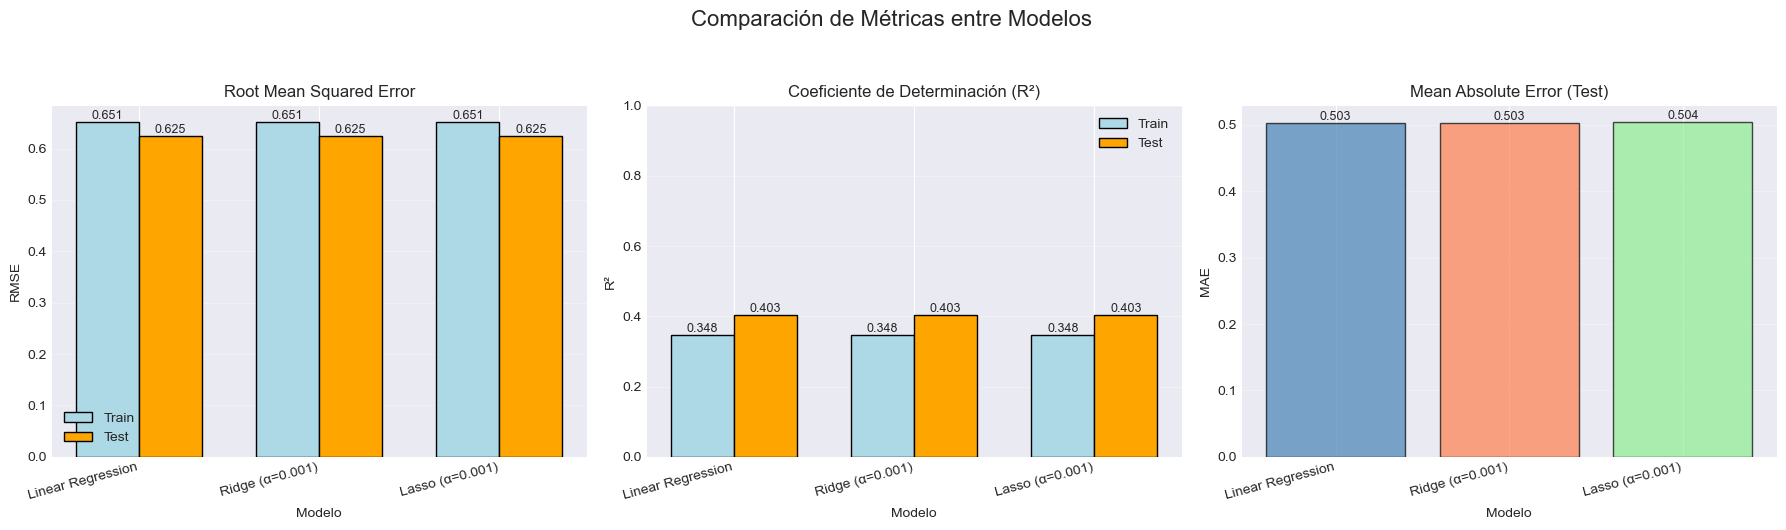

In [54]:
# TODO: Crea visualizaciones para comparar los modelos
# 1. Gráfico de barras comparando RMSE
# 2. Gráfico de barras comparando R²
# Tu código aquí
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Comparación de Métricas entre Modelos', fontsize=16, y=1.05)

models = comparison_df['Modelo'].tolist()
x_pos = np.arange(len(models))
colors = ['steelblue', 'coral', 'lightgreen']

# RMSE
ax1 = axes[0]
width = 0.35
bars1 = ax1.bar(x_pos - width/2, comparison_df['RMSE Train'], width, label='Train', color='lightblue', edgecolor='black')
bars2 = ax1.bar(x_pos + width/2, comparison_df['RMSE Test'], width, label='Test', color='orange', edgecolor='black')
ax1.set_xlabel('Modelo')
ax1.set_ylabel('RMSE')
ax1.set_title('Root Mean Squared Error')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(models, rotation=15, ha='right')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# R²
ax2 = axes[1]
bars3 = ax2.bar(x_pos - width/2, comparison_df['R² Train'], width, label='Train', color='lightblue', edgecolor='black')
bars4 = ax2.bar(x_pos + width/2, comparison_df['R² Test'], width, label='Test', color='orange', edgecolor='black')
ax2.set_xlabel('Modelo')
ax2.set_ylabel('R²')
ax2.set_title('Coeficiente de Determinación (R²)')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(models, rotation=15, ha='right')
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')
ax2.set_ylim([0, 1])

# MAE
ax3 = axes[2]
bars5 = ax3.bar(x_pos, comparison_df['MAE Test'], color=colors, edgecolor='black', alpha=0.7)
ax3.set_xlabel('Modelo')
ax3.set_ylabel('MAE')
ax3.set_title('Mean Absolute Error (Test)')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(models, rotation=15, ha='right')
ax3.grid(True, alpha=0.3, axis='y')

# Agregar valores en las barras
for bars in [bars1, bars2, bars3, bars4, bars5]:
    for bar in bars:
        height = bar.get_height()
        if bars in [bars3, bars4]:  # Para R²
            ax = ax2
        elif bars in [bars1, bars2]:  # Para RMSE
            ax = ax1
        else:  # Para MAE
            ax = ax3
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


## 7. Análisis de Residuos

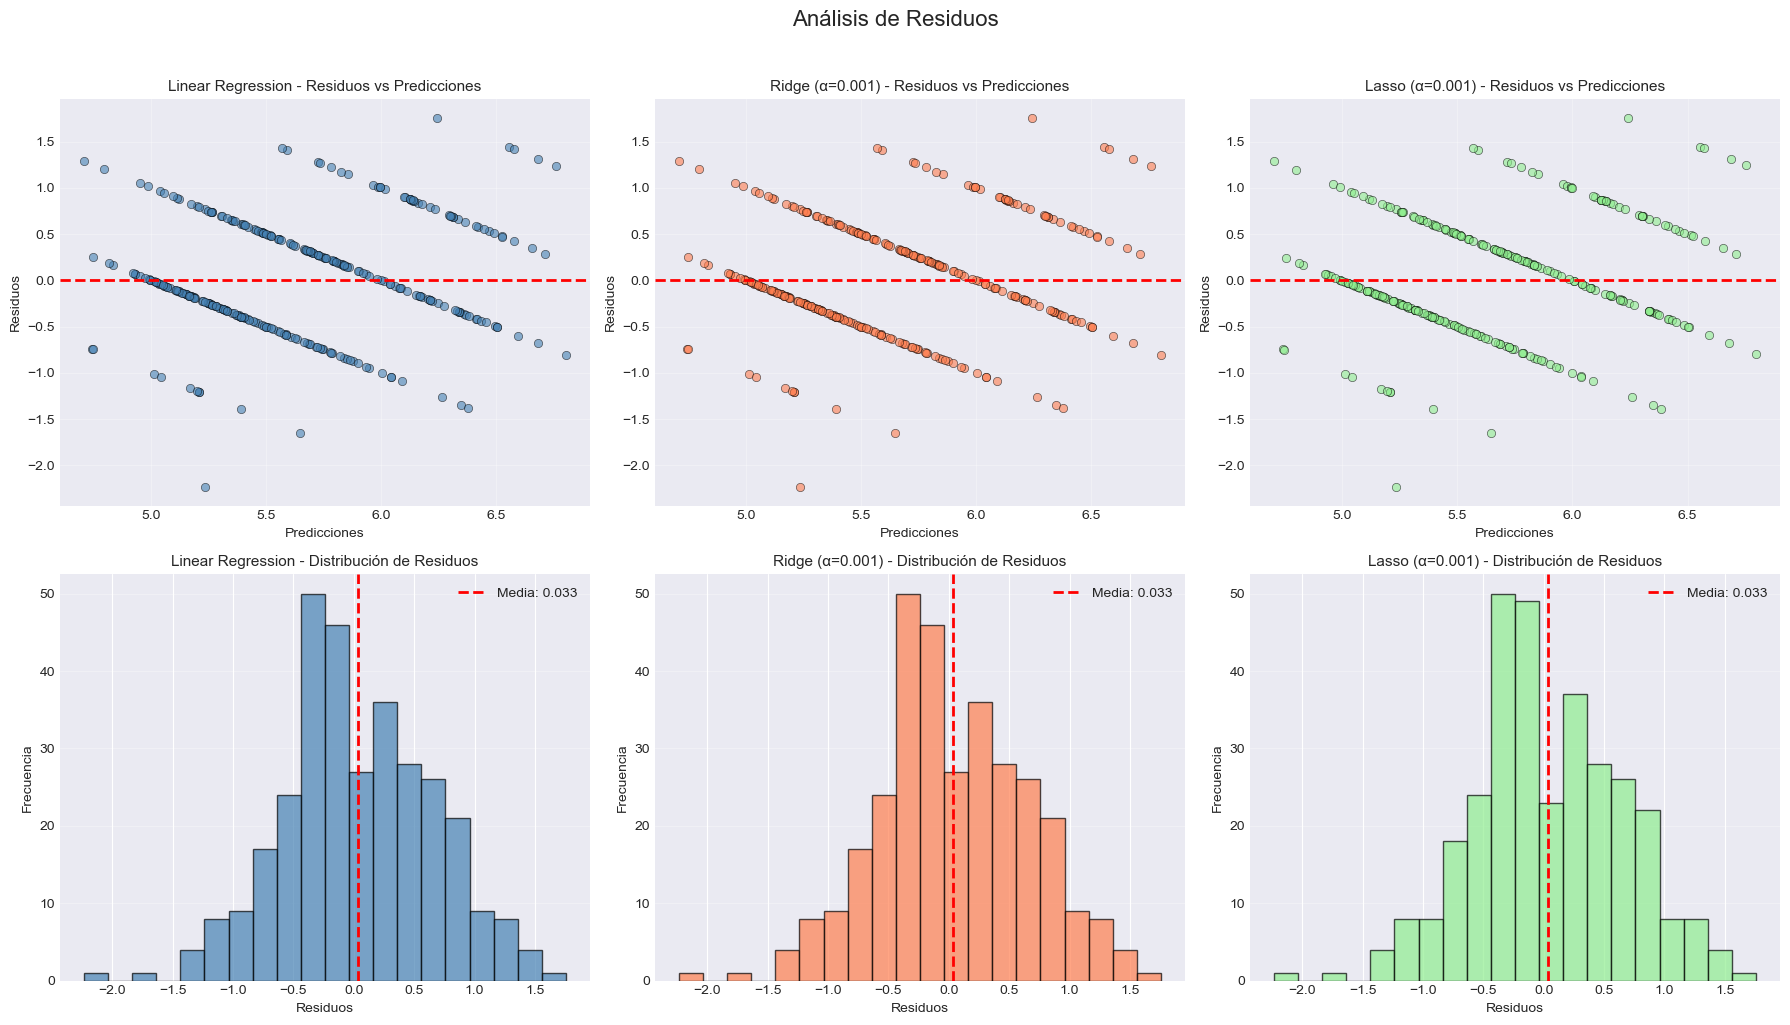

In [45]:
# TODO: Para el mejor modelo, crea:
# 1. Gráfico de residuos vs predicciones
# 2. Histograma de residuos
# 3. Q-Q plot de residuos
# Tu código aquí
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Análisis de Residuos', fontsize=16, y=1.02)

models_resid = [
    ('Linear Regression', y_pred_lr_test, 'steelblue'),
    (f'Ridge (α={best_alpha_ridge})', y_pred_ridge_test, 'coral'),
    (f'Lasso (α={best_alpha_lasso})', y_pred_lasso_test, 'lightgreen')
]

for idx, (name, predictions, color) in enumerate(models_resid):
    residuals = y_test - predictions
    
    # Gráfico de residuos vs predicciones
    ax1 = axes[0, idx]
    ax1.scatter(predictions, residuals, alpha=0.6, color=color, edgecolors='black', linewidth=0.5)
    ax1.axhline(y=0, color='red', linestyle='--', linewidth=2)
    ax1.set_xlabel('Predicciones', fontsize=10)
    ax1.set_ylabel('Residuos', fontsize=10)
    ax1.set_title(f'{name} - Residuos vs Predicciones', fontsize=11)
    ax1.grid(True, alpha=0.3)
    
    # Histograma de residuos
    ax2 = axes[1, idx]
    ax2.hist(residuals, bins=20, edgecolor='black', alpha=0.7, color=color)
    ax2.set_xlabel('Residuos', fontsize=10)
    ax2.set_ylabel('Frecuencia', fontsize=10)
    ax2.set_title(f'{name} - Distribución de Residuos', fontsize=11)
    ax2.grid(True, alpha=0.3, axis='y')
    
    # Agregar línea de media
    mean_resid = residuals.mean()
    ax2.axvline(mean_resid, color='red', linestyle='--', linewidth=2, label=f'Media: {mean_resid:.3f}')
    ax2.legend()

plt.tight_layout()
plt.show()


## 8. Importancia de Características

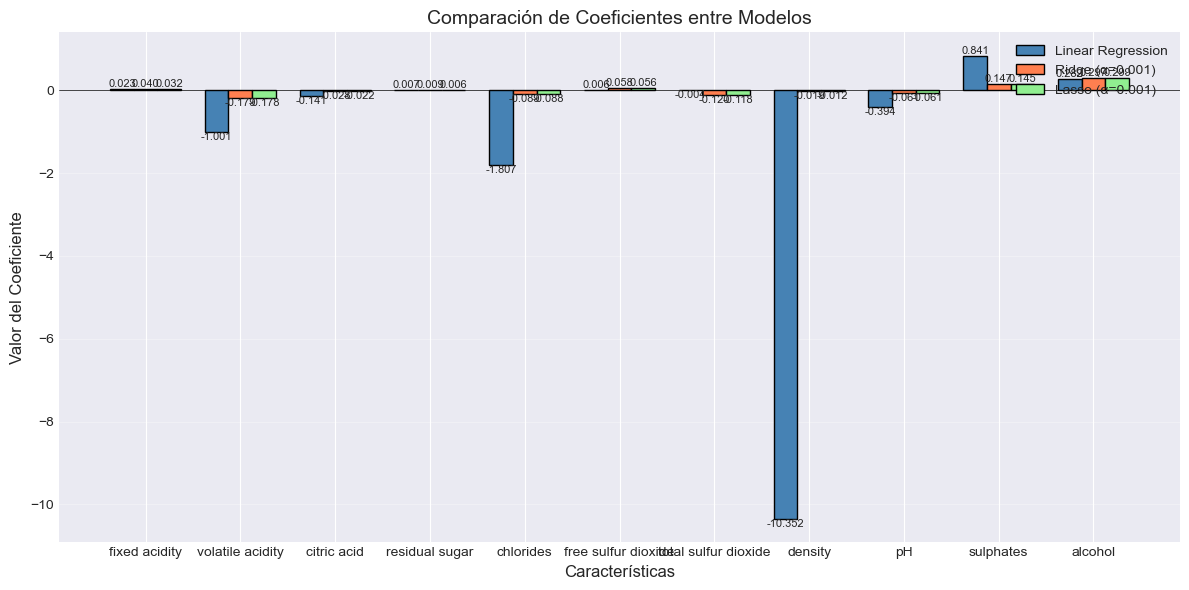

In [46]:
# TODO: Visualiza los coeficientes de los tres modelos en un mismo gráfico
# Esto te ayudará a entender qué características son más importantes
# Tu código aquí
fig, ax = plt.subplots(figsize=(12, 6))

features = X.columns.tolist()
x_pos = np.arange(len(features))
width = 0.25

# Coeficientes de cada modelo
coef_lr = lr_model.coef_
coef_ridge = ridge_model_best.coef_
coef_lasso = lasso_model_best.coef_

bars1 = ax.bar(x_pos - width, coef_lr, width, label='Linear Regression', color='steelblue', edgecolor='black')
bars2 = ax.bar(x_pos, coef_ridge, width, label=f'Ridge (α={best_alpha_ridge})', color='coral', edgecolor='black')
bars3 = ax.bar(x_pos + width, coef_lasso, width, label=f'Lasso (α={best_alpha_lasso})', color='lightgreen', edgecolor='black')

ax.set_xlabel('Características', fontsize=12)
ax.set_ylabel('Valor del Coeficiente', fontsize=12)
ax.set_title('Comparación de Coeficientes entre Modelos', fontsize=14)
ax.set_xticks(x_pos)
ax.set_xticklabels(features)
ax.legend(loc='upper right')
ax.grid(True, alpha=0.3, axis='y')
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)

# Agregar valores en las barras
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        if abs(height) > 0.001:
            ax.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.3f}', ha='center', va='bottom' if height > 0 else 'top', fontsize=8)

plt.tight_layout()
plt.show()

## 9. Validación Cruzada Final del Mejor Modelo

In [ ]:
# TODO: Realiza validación cruzada con 10 folds del mejor modelo
# Reporta la media y desviación estándar del RMSE
# Tu código aquí
from sklearn.model_selection import cross_val_score, cross_validate
print("\n" + "="*60)
print("VALIDACIÓN CRUZADA CON 10 FOLDS - REGRESIÓN LINEAL")
print("="*60)

# Crear modelo de regresión lineal para validación cruzada
lr_cv_model = LinearRegression()

# Realizar validación cruzada con 10 folds para RMSE
print("Ejecutando validación cruzada de 10 folds...")
cv_mse_scores = cross_val_score(lr_cv_model, X_train, y_train, 
                                cv=10, scoring='neg_mean_squared_error', 
                                n_jobs=-1)

# Convertir MSE a RMSE (quitar signo negativo y calcular raíz)
cv_rmse_scores = np.sqrt(-cv_mse_scores)

# Calcular estadísticas del RMSE
rmse_mean = cv_rmse_scores.mean()
rmse_std = cv_rmse_scores.std()
rmse_min = cv_rmse_scores.min()
rmse_max = cv_rmse_scores.max()

# Mostrar resultados principales
print(f"\n RESULTADOS DE VALIDACIÓN CRUZADA:")
print(f"   Media del RMSE: {rmse_mean:.4f}")
print(f"   Desviación Estándar del RMSE: {rmse_std:.4f}")
print(f"   Rango del RMSE: [{rmse_min:.4f}, {rmse_max:.4f}]")




VALIDACIÓN CRUZADA CON 10 FOLDS - REGRESIÓN LINEAL
Ejecutando validación cruzada de 10 folds...

📊 RESULTADOS DE VALIDACIÓN CRUZADA:
   🎯 Media del RMSE: 0.6579
   📊 Desviación Estándar del RMSE: 0.0592
   📏 Rango del RMSE: [0.4959, 0.7166]


## 10. Conclusiones y Preguntas de Reflexión

### Preguntas para responder:

1. **¿Cuál modelo tuvo el mejor desempeño? ¿Por qué crees que fue así?**
   - Tu respuesta: el de regresión lineal, probablemente por que funciona con minimos cuadrados y eso minimiza la varianza

2. **¿Qué características son las más importantes para predecir la calidad del vino?**
   - Tu respuesta: El alcohol, la acidez volatil, el acido citrico y los sulfatos

3. **¿Observas señales de sobreajuste en algún modelo? ¿Cómo lo identificaste?**
   - Tu respuesta: A mi parecer no, a pesar que la R2 era más alta en el de entrenamiento que en el de prueba, los coeficientes salieron bien y los residuales también.

4. **¿Cómo cambió el rendimiento de Ridge y Lasso con diferentes valores de alpha?**
   - Tu respuesta: Siempre buscaban los valores de alpha más bajos

5. **¿Qué ventajas observaste al usar validación cruzada para seleccionar hiperparámetros?**
   - Tu respuesta: En la parte final aumentó el RMSE, no comprendo muy bien por qué

6. **Si Lasso eliminó algunas características, ¿crees que esto mejoró o empeoró el modelo? ¿Por qué?**
   - Tu respuesta: No eliminó características, pero si mantenia un buen modelo

7. **¿Qué otros pasos podrías tomar para mejorar el rendimiento del modelo?**
   - Tu respuesta: Incluir interacciones entre las variables

## Ejercicio Extra: Ingeniería de Características

### Desafío:
Intenta mejorar el rendimiento del modelo creando nuevas características:

1. Crea interacciones entre variables (ej: alcohol × pH)
2. Crea características polinomiales
3. Agrupa la calidad en categorías (baja: 3-4, media: 5-6, alta: 7-8) y úsala como característica
4. Crea ratios entre características relacionadas

In [ ]:
# TODO: Implementa ingeniería de características y evalúa si mejora el modelo
# Tu código aquí
